# **Importing the Libraries**


In [102]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [103]:
print(f'matplotlib vesion: {matplotlib.__version__}')
print(f'pandas vesion:     {pd.__version__}')
print(f'numpy vesion:      {np.__version__}')
print(f'seaborn vesion:    {sns.__version__}')
print(f'sklearn vesion:    {skl.__version__}')

matplotlib vesion: 3.2.2
pandas vesion:     1.1.5
numpy vesion:      1.19.5
seaborn vesion:    0.11.1
sklearn vesion:    0.22.2.post1


## **Variables Definition:**

* **ID :** Unique ID
* **CountryCode :** Country Code
* **region_code :**  Region Code
* **year :** Year
* **sex :** Sex
* **agefrom :** Starting Age
* **ageto :** Finishing Age
* **percentage_no_schooling :** Percentage of No Schooling Attained in Pop.
* **percentage_primary_schooling :** Percentage of Primary Schooling Attained in Pop.
* **percentage_primary_schooling_completed :** Percentage of Complete Primary  Schooling Attained in Pop.
* **percentage_secondary_schooling :** Percentage of Secondary Schooling Attained in Pop.
* **percentage_secondary_schooling_completed :** Percentage of Complete Secondary Schooling Attained in Pop.
* **percentage_tertiary_schooling :** Percentage of Tertiary Schooling Attained in Pop.
* **percentage_tertiary_schooling_completed :** Percentage of Complete Tertiary Schooling Attained in Pop.
* **yr_sch :** Average Years of Schooling Attained
* **literate_pop :** Literate population
* **target = LR :** Literacy rate (in percentage)


# **Loading the Data**

In [104]:
train = pd.read_csv('/content/drive/MyDrive/Projects/Silicon Valley 21st Century Education Hackathon/Silicon_Valley_Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/Silicon Valley 21st Century Education Hackathon/Silicon_Vally_Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/Projects/Silicon Valley 21st Century Education Hackathon/SampleSubmission.csv')

In [105]:
train

,ID,countryCode,year,sex,agefrom,ageto,percentage_no_schooling,percentage_primary_schooling,percentage_primary_schooling_completed,percentage_secondary_schooling,percentage_secondary_schooling_completed,percentage_tertiary_schooling,percentage_tertiary_schooling_completed,yr_sch,region_code,literate_pop,target
0,ID_00AMK8K,155,1990,MF,15,999,8.3900,26.270000,15.830000,58.570000,26.420000,6.770000,4.400000,8.540000,Latin America and the Caribbean,7435.0,91.609167
1,ID_00ANS9C,115,2005,MF,25,999,0.6325,6.980833,6.363333,77.683333,49.995833,14.700833,13.546667,11.631667,Europe and Central Asia,14350.0,99.362969
2,ID_00AQU1S,30,2000,M,15,999,68.5300,26.320000,16.020000,4.620000,2.320000,0.540000,0.310000,1.550000,Sub-Saharan Africa,1458.0,31.469890
3,ID_00AVQ7Q,143,1960,MF,15,999,12.5300,69.370000,49.260000,8.130000,1.100000,9.970000,5.510000,7.490000,Latin America and the Caribbean,45.0,86.538462
4,ID_00BAH2C,70,1955,MF,25,999,20.9800,55.900000,22.380000,20.850000,10.240000,2.270000,1.950000,4.890000,Latin America and the Caribbean,2380.0,79.017264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,ID_99YTK0T,38,1950,MF,25,999,61.1825,20.794167,13.840833,15.994167,3.747500,2.030000,0.256667,3.115000,Sub-Saharan Africa,4565.0,38.818027
14012,ID_99ZDM2A,77,1990,MF,25,999,4.8800,55.140000,29.530000,30.080000,13.120000,9.900000,5.290000,7.130000,Latin America and the Caribbean,1720.0,95.080155
14013,ID_99ZMQ0L,98,1990,MF,15,999,5.2000,41.400000,21.520000,34.200000,16.560000,18.800000,6.730000,7.100000,East Asia and the Pacific,34077.0,94.398737
14014,ID_99ZNU2T,329,1990,M,25,999,4.5000,47.140000,23.710000,39.450000,27.560000,8.910000,6.220000,8.700000,Europe and Central Asia,2913.0,95.476893


# **EDA**

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        14016 non-null  object 
 1   countryCode                               14016 non-null  int64  
 2   year                                      14016 non-null  int64  
 3   sex                                       14016 non-null  object 
 4   agefrom                                   14016 non-null  int64  
 5   ageto                                     14016 non-null  int64  
 6   percentage_no_schooling                   14016 non-null  float64
 7   percentage_primary_schooling              14016 non-null  float64
 8   percentage_primary_schooling_completed    14016 non-null  float64
 9   percentage_secondary_schooling            14016 non-null  float64
 10  percentage_secondary_schooling_com

In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        1168 non-null   object 
 1   countryCode                               1168 non-null   int64  
 2   year                                      1168 non-null   int64  
 3   sex                                       1168 non-null   object 
 4   agefrom                                   1168 non-null   int64  
 5   ageto                                     1168 non-null   int64  
 6   percentage_no_schooling                   1168 non-null   float64
 7   percentage_primary_schooling              1168 non-null   float64
 8   percentage_primary_schooling_completed    1168 non-null   float64
 9   percentage_secondary_schooling            1168 non-null   float64
 10  percentage_secondary_schooling_compl

In [108]:
train.ageto.value_counts()

999    14016
Name: ageto, dtype: int64

In [109]:
train.year.value_counts()

1975    1168
1990    1168
1950    1168
2005    1168
1965    1168
1980    1168
1995    1168
1955    1168
1970    1168
1985    1168
2000    1168
1960    1168
Name: year, dtype: int64

In [110]:
test.year.value_counts()

2010    1168
Name: year, dtype: int64

In [111]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)

In [112]:
all_data.drop(['ageto','year'],axis=1,inplace=True)

In [113]:
encoder = LabelEncoder()

for col in ['sex','region_code','agefrom','countryCode']:
  all_data[col] = all_data[col].map(train.groupby(col)['target'].mean())

# **Bulding Model**

In [188]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((14016, 21), (1168, 21))

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        14016 non-null  object 
 1   countryCode                               14016 non-null  int64  
 2   year                                      14016 non-null  int64  
 3   sex                                       14016 non-null  object 
 4   agefrom                                   14016 non-null  int64  
 5   ageto                                     14016 non-null  int64  
 6   percentage_no_schooling                   14016 non-null  float64
 7   percentage_primary_schooling              14016 non-null  float64
 8   percentage_primary_schooling_completed    14016 non-null  float64
 9   percentage_secondary_schooling            14016 non-null  float64
 10  percentage_secondary_schooling_com

In [209]:
# features = all_data.columns.difference(['ID','target'])
features = ['percentage_no_schooling','literate_pop']
X = train_df[features]
y = train_df['target']

In [201]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [202]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [227]:
model = RandomForestRegressor(n_estimators=250,
                              random_state=0)

# Create a StratifiedKFold object
kf = KFold(n_splits=5, shuffle=True, random_state=123)

fold_metrics = []
n_fold = 1
for train_index, test_index in kf.split(X):
  cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y[train_index], y[test_index]
  # Train a model
  model.fit(cv_train,y_train_cv)
  # Make predictions
  predictions = model.predict(cv_test)
  # Calculate the metric
  metric = mean_absolute_error(y_test_cv, predictions)
  fold_metrics.append(metric)
  print(f'Fold {n_fold}: Done')
  n_fold += 1

np.mean(fold_metrics), np.std(fold_metrics)

Fold 1: Done
Fold 2: Done
Fold 3: Done
Fold 4: Done
Fold 5: Done


(0.08580067253110607, 0.0065165574508801345)

In [218]:
0.09569632521892558

0.09569632521892558

In [228]:
Local_Val = round(np.mean(fold_metrics),4)

[Text(0, 0, 'percentage_no_schooling'), Text(0, 0, 'literate_pop')]

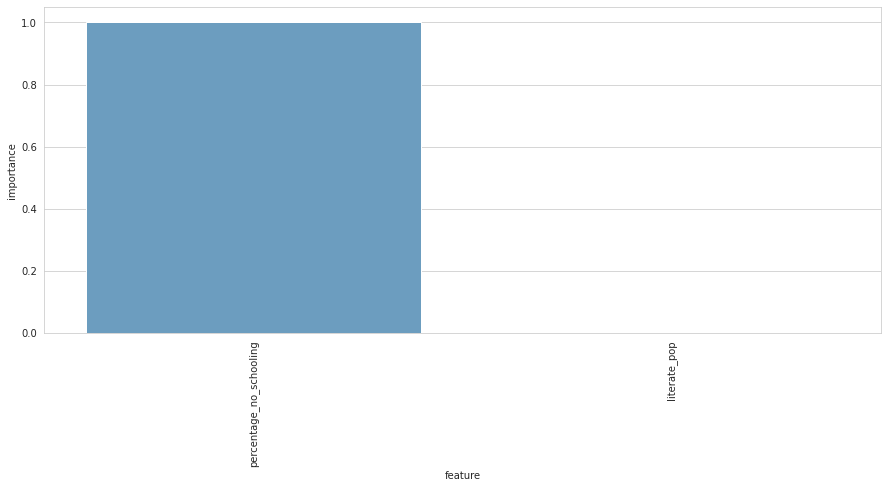

In [220]:
importance = model.feature_importances_

importance_df = pd.DataFrame({'feature':X.columns,
'importance':importance})
importance_df.sort_values('importance',ascending = False,inplace=True)

f, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(data=importance_df,x='feature', y = 'importance',
palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# **Making Submission File**

In [229]:
prediction = model.predict(test_df[features])
ss.target = prediction

In [230]:
# Create a csv file and upload to zindi 
ss.to_csv(f'Silicon_Vally_sub({Local_Val}).csv', index = False)